In [1]:
from utils import *


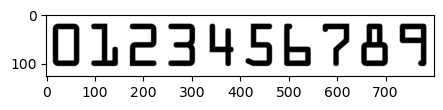

In [2]:
template_path = "./template-matching-ocr/ocr_a_reference.png"
template_img = readImage(template_path)
ref = cv.cvtColor(template_img, cv.COLOR_RGB2GRAY)
showImage(ref, cmap='gray')

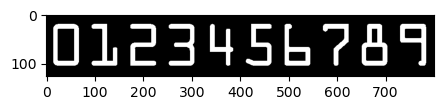

In [3]:
ref = cv.threshold(ref, 10, 255, cv.THRESH_BINARY_INV)[1]
showImage(ref, cmap='gray')

In [4]:
ref_cnts = cv.findContours(ref.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
ref_cnts

((array([[[734,  20]],
  
         [[733,  21]],
  
         [[732,  21]],
  
         [[731,  22]],
  
         [[731,  23]],
  
         [[730,  24]],
  
         [[730,  54]],
  
         [[731,  55]],
  
         [[731,  56]],
  
         [[732,  57]],
  
         [[772,  57]],
  
         [[774,  59]],
  
         [[774,  94]],
  
         [[773,  95]],
  
         [[771,  95]],
  
         [[770,  96]],
  
         [[769,  96]],
  
         [[769,  97]],
  
         [[768,  98]],
  
         [[768, 101]],
  
         [[769, 102]],
  
         [[769, 103]],
  
         [[770, 103]],
  
         [[771, 104]],
  
         [[780, 104]],
  
         [[782, 102]],
  
         [[782, 100]],
  
         [[783,  99]],
  
         [[783,  26]],
  
         [[782,  25]],
  
         [[782,  22]],
  
         [[781,  21]],
  
         [[780,  21]],
  
         [[779,  20]]], dtype=int32),
  array([[[665,  20]],
  
         [[664,  21]],
  
         [[663,  21]],
  
         [[663,  22]],
  


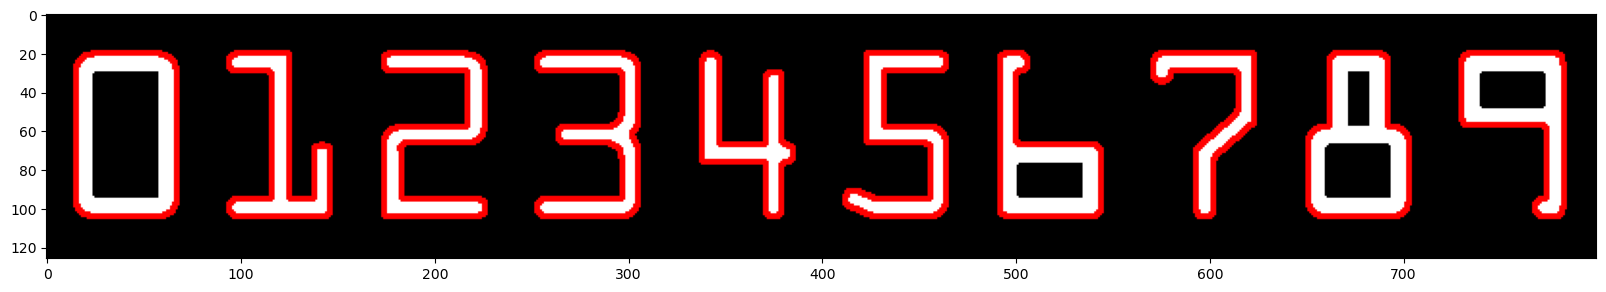

In [5]:
dst = cv.cvtColor(ref, cv.COLOR_GRAY2RGB)
# for cnt in ref_cnts[0]:
#     dst = cv.drawContours(dst, cnt, -1, (255, 255, 0), 7)
dst = cv.drawContours(dst, ref_cnts[0], -1, (255, 0, 0), 2)
showImage(dst, figsize=(20, 20))

In [6]:
import imutils
from imutils import contours

refCnts = imutils.grab_contours(ref_cnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}
refCnts

(array([[[ 24,  20]],
 
        [[ 23,  21]],
 
        [[ 20,  21]],
 
        [[ 16,  25]],
 
        [[ 16,  26]],
 
        [[ 15,  27]],
 
        [[ 15,  98]],
 
        [[ 16,  99]],
 
        [[ 16, 100]],
 
        [[ 19, 103]],
 
        [[ 21, 103]],
 
        [[ 22, 104]],
 
        [[ 60, 104]],
 
        [[ 61, 103]],
 
        [[ 62, 103]],
 
        [[ 63, 102]],
 
        [[ 64, 102]],
 
        [[ 65, 101]],
 
        [[ 65, 100]],
 
        [[ 66,  99]],
 
        [[ 66,  98]],
 
        [[ 67,  97]],
 
        [[ 67,  28]],
 
        [[ 66,  27]],
 
        [[ 66,  25]],
 
        [[ 63,  22]],
 
        [[ 62,  22]],
 
        [[ 61,  21]],
 
        [[ 59,  21]],
 
        [[ 58,  20]]], dtype=int32),
 array([[[ 98,  20]],
 
        [[ 97,  21]],
 
        [[ 96,  21]],
 
        [[ 94,  23]],
 
        [[ 94,  27]],
 
        [[ 96,  29]],
 
        [[114,  29]],
 
        [[116,  31]],
 
        [[116,  94]],
 
        [[115,  95]],
 
        [[ 97,  95]],
 
   

In [7]:
# loop over the OCR-A reference contours
for (i, c) in enumerate(refCnts):
	# compute the bounding box for the digit, extract it, and resize
	# it to a fixed size
	(x, y, w, h) = cv.boundingRect(c)
	roi = ref[y:y + h, x:x + w]
	roi = cv.resize(roi, (57, 88))

	# update the digits dictionary, mapping the digit name to the ROI
	digits[i] = roi
digits

{0: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 1: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 200, ...,   0,   0,   0],
        [  0, 209, 251, ...,   0,   0,   0],
        ...,
        [  0, 228, 255, ..., 255, 252, 233],
        [  0, 216, 242, ..., 253, 216,   0],
        [  0,   0,   0, ..., 210,   0,   0]], dtype=uint8),
 2: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 216, 242, ...,   0,   0,   0],
        [233, 252, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 255, 252, 233],
        [255, 255, 255, ..., 242, 216,   0],
        [255, 255, 255, ...,   0,   0,   0]], dtype=uint8),
 3: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 200, ...,   0,   0,   0],
        [  0, 209, 251, ...,   0,   0,   0],
        ...,
        [  0, 228,

In [8]:
target_path = "./template-matching-ocr/images/credit_card_01.png"

In [9]:
# initialize a rectangular (wider than it is tall) and square
# structuring kernel
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (9, 3))
sq_kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

rect_kernel, sq_kernel

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=uint8))

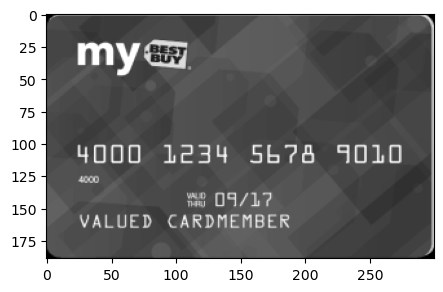

In [10]:
# load the input image, resize it, and convert it to grayscale
image = cv.imread(target_path)
image = imutils.resize(image, width=300)
target = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
showImage(target, cmap='gray')

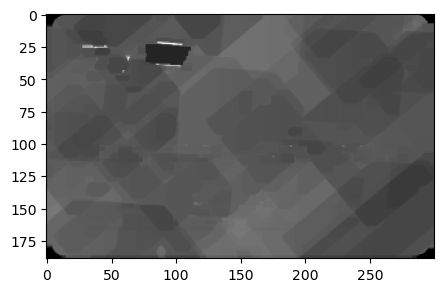

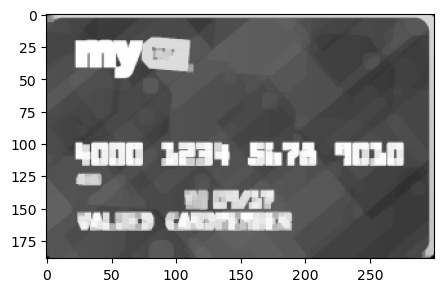

In [11]:
erode = cv.morphologyEx(target, cv.MORPH_ERODE, rect_kernel)
showImage(erode, cmap='gray')
dilate = cv.morphologyEx(target, cv.MORPH_DILATE, sq_kernel)
showImage(dilate, cmap='gray')

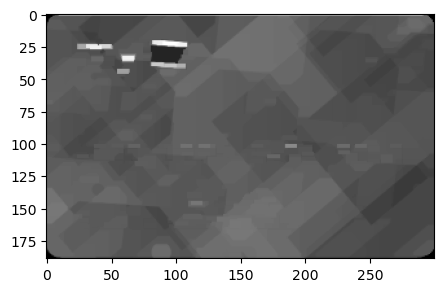

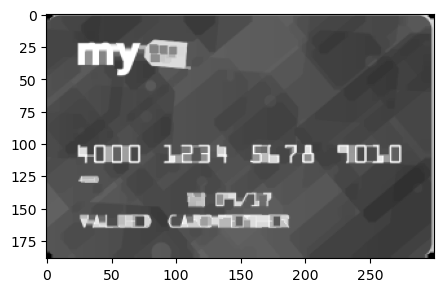

In [12]:
open = cv.morphologyEx(target, cv.MORPH_OPEN, rect_kernel)
showImage(open, cmap='gray')
close = cv.morphologyEx(target, cv.MORPH_CLOSE, sq_kernel)
showImage(close, cmap='gray')

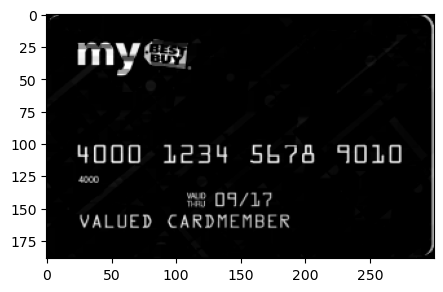

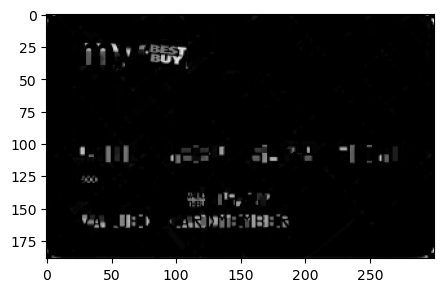

In [13]:
tophat = cv.morphologyEx(target, cv.MORPH_TOPHAT, rect_kernel)
showImage(tophat, cmap='gray')
blackhat = cv.morphologyEx(target, cv.MORPH_BLACKHAT, sq_kernel)
showImage(blackhat, cmap='gray')

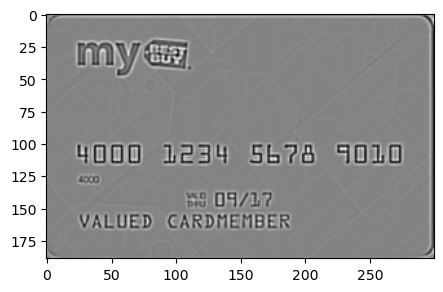

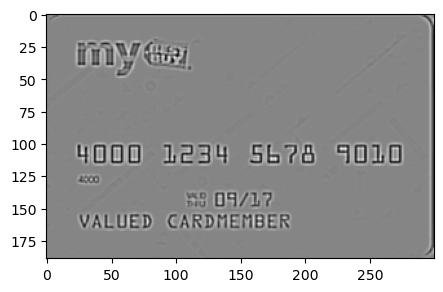

In [14]:
dst = cv.Laplacian(target, ddepth=cv.CV_32F, ksize=5)
showImage(dst, cmap='gray')
dst = cv.Laplacian(tophat, ddepth=cv.CV_32F, ksize=5)
showImage(dst, cmap='gray')

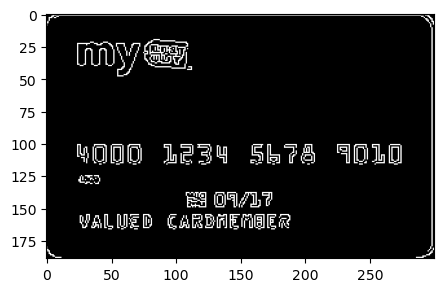

In [15]:
dst = cv.Canny(target, 100, 180)
showImage(dst, cmap='gray')

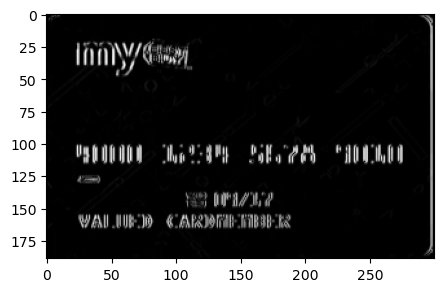

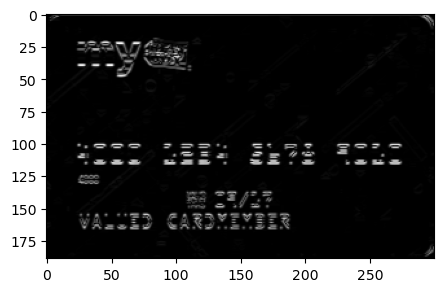

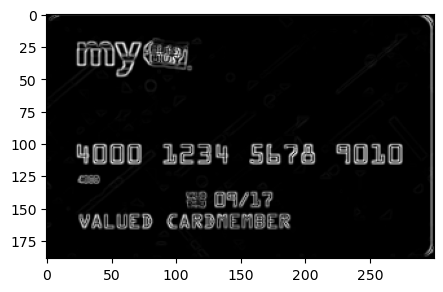

In [16]:
grad_x = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=1, dy=0, ksize=-1)
grad_x = np.absolute(grad_x)
showImage(grad_x, cmap='gray')
grad_y = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=0, dy=1, ksize=-1)
grad_y = np.absolute(grad_y)
showImage(grad_y, cmap='gray')
grad = grad_y+grad_x
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad_a = (255 * ((grad - minVal) / (maxVal - minVal)))
grad_a = grad_a.astype("uint8")
showImage(grad_a, cmap='gray')

In [17]:
grad_x = grad_a

In [18]:
(minVal, maxVal) = (np.min(grad_x), np.max(grad_x))
grad_x = (255 * ((grad_x - minVal) / (maxVal - minVal)))
grad_x = grad_x.astype("uint8")

In [19]:
grad_x = cv.morphologyEx(grad_x, cv.MORPH_CLOSE, rect_kernel)
thresh = cv.threshold(grad_x, 0, 255, cv.THRESH_BINARY|cv.THRESH_OTSU)
thresh

(75.0,
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

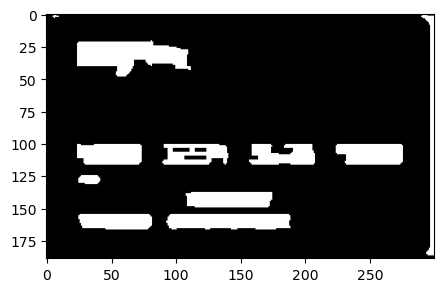

In [20]:
showImage(thresh[1], cmap='gray')

In [21]:
thresh = cv.morphologyEx(thresh[1], cv.MORPH_CLOSE, sq_kernel)
thresh

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

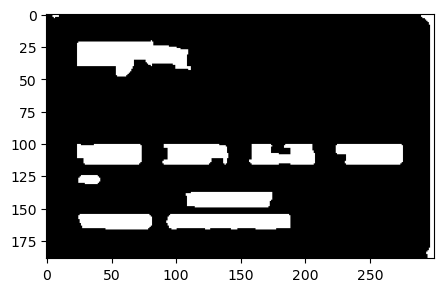

In [22]:
showImage(thresh, cmap='gray')

In [23]:
target_cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
target_cnts = imutils.grab_contours(target_cnts)
len(target_cnts)

11

In [24]:
cv.boundingRect(target_cnts[1])

(25, 155, 57, 12)

In [25]:
locs = []
# loop over the contours
for (i, c) in enumerate(target_cnts):
	# compute the bounding box of the contour, then use the
	# bounding box coordinates to derive the aspect ratio
	(x, y, w, h) = cv.boundingRect(c)
	ar = w / float(h)

	# since credit cards used a fixed size fonts with 4 groups
	# of 4 digits, we can prune potential contours based on the
	# aspect ratio
	if ar > 2.5 and ar < 4.0:
		# contours can further be pruned on minimum/maximum width
		# and height
		if (w > 40 and w < 55) and (h > 10 and h < 20):
			# append the bounding box region of the digits group
			# to our locations list
			locs.append((x, y, w, h))

# sort the digit locations from left-to-right, then initialize the
# list of classified digits
locs = sorted(locs, key=lambda x:x[0])
locs


[(24, 101, 50, 16), (90, 101, 51, 16), (157, 101, 51, 16), (224, 101, 52, 16)]

In [26]:
digits

{0: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 1: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 200, ...,   0,   0,   0],
        [  0, 209, 251, ...,   0,   0,   0],
        ...,
        [  0, 228, 255, ..., 255, 252, 233],
        [  0, 216, 242, ..., 253, 216,   0],
        [  0,   0,   0, ..., 210,   0,   0]], dtype=uint8),
 2: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 216, 242, ...,   0,   0,   0],
        [233, 252, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 255, 252, 233],
        [255, 255, 255, ..., 242, 216,   0],
        [255, 255, 255, ...,   0,   0,   0]], dtype=uint8),
 3: array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 200, ...,   0,   0,   0],
        [  0, 209, 251, ...,   0,   0,   0],
        ...,
        [  0, 228,

In [27]:
output = []
# loop over the 4 groupings of 4 digits
for (i, (gX, gY, gW, gH)) in enumerate(locs):
	# initialize the list of group digits
	groupOutput = []

	# extract the group ROI of 4 digits from the grayscale image,
	# then apply thresholding to segment the digits from the
	# background of the credit card
	group = target[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
	group = cv.threshold(group, 0, 255,
		cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

	# detect the contours of each individual digit in the group,
	# then sort the digit contours from left to right
	digitCnts = cv.findContours(group.copy(), cv.RETR_EXTERNAL,
		cv.CHAIN_APPROX_SIMPLE)
	digitCnts = imutils.grab_contours(digitCnts)
	digitCnts = contours.sort_contours(digitCnts,
		method="left-to-right")[0]

	# loop over the digit contours
	for c in digitCnts:
		# compute the bounding box of the individual digit, extract
		# the digit, and resize it to have the same fixed size as
		# the reference OCR-A images
		(x, y, w, h) = cv.boundingRect(c)
		roi = group[y:y + h, x:x + w]
		roi = cv.resize(roi, (57, 88))

		# initialize a list of template matching scores
		scores = []

		# loop over the reference digit name and digit ROI
		for (digit, digitROI) in digits.items():
			# apply correlation-based template matching, take the
			# score, and update the scores list
			result = cv.matchTemplate(roi, digitROI,
				cv.TM_CCOEFF)
			(_, score, _, _) = cv.minMaxLoc(result)
			scores.append(score)

		# the classification for the digit ROI will be the reference
		# digit name with the *largest* template matching score
		groupOutput.append(str(np.argmax(scores)))

	# draw the digit classifications around the group
	cv.rectangle(image, (gX - 5, gY - 5),
		(gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
	cv.putText(image, "".join(groupOutput), (gX, gY - 15),
		cv.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)

	# update the output digits list
	output.extend(groupOutput)
''.join(output)

'4000123456789010'

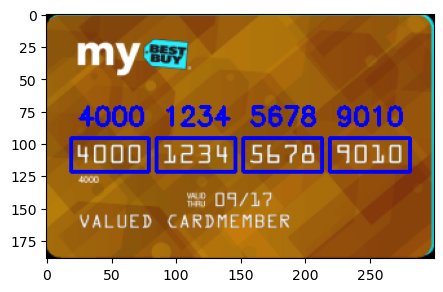

In [28]:
showImage(image)